<a href="https://colab.research.google.com/github/Bhavaz/Python/blob/master/DL/DL2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.7244 - acc: 0.8640 - val_loss: 0.2709 - val_acc: 0.9344
Epoch 2/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.2052 - acc: 0.9453 - val_loss: 0.1631 - val_acc: 0.9552
Epoch 3/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1302 - acc: 0.9641 - val_loss: 0.1209 - val_acc: 0.9678
Epoch 4/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0964 - acc: 0.9721 - val_loss: 0.1257 - val_acc: 0.9633
Epoch 5/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0730 - acc: 0.9785 - val_loss: 0.1035 - val_acc: 0.9704
Epoch 6/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0558 - acc: 0.9833 - val_loss: 0.1075 - val_acc: 0.9687
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0438 - acc: 0.9871 - val_loss: 0.0922 - 

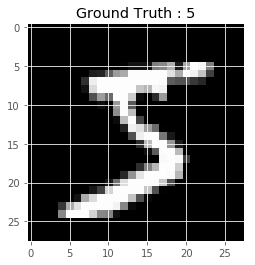

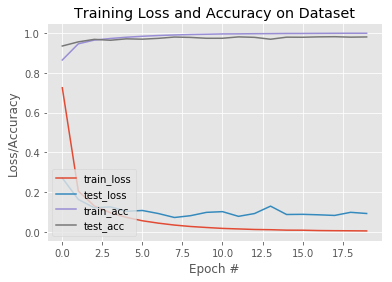

In [0]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

print(model.summary())
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
